Análisis Estadístico Descriptivo (EDA)
1. Resumen Estadístico Proporcionaremos medidas de tendencia central y dispersión para todas las variables relevantes en los DataFrames. 
2. Visualización Crearemos histogramas, gráficos de caja y gráficos de dispersión para identificar patrones y distribuciones. 
3. Identificación de Valores Atípicos Detectaremos valores atípicos mediante métricas estadísticas y visualizaciones, como gráficos de caja.


In [1]:
# Manipulación y Análisis de Datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('../dataframe/unido_final.csv')

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Resumen de las columnas y tipos de datos
print("\nInformación general del DataFrame:")
print(df.info())


Primeras filas del DataFrame:
   Unnamed: 0   modelo        km   color   precio  year
0           0  Model 3   63000.0    azul  25990.0  2022
1           1  Model S   94000.0   negro  51990.0  2020
2           2  Model 3  138000.0    gris  26990.0  2020
3           3  Model X  170000.0  blanco  44800.0  2019
4           4  Model 3   61046.0    rojo  29900.0  2019

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1146 non-null   int64  
 1   modelo      1146 non-null   object 
 2   km          1146 non-null   float64
 3   color       1146 non-null   object 
 4   precio      1146 non-null   float64
 5   year        1146 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 53.8+ KB
None


In [5]:
# Resumen Estadístico para el DataFrame
def summarize_dataframe(df, name):
    print(f"Resumen Estadístico de {name}:")
    print(df.describe(include='all'))  # Include='all' para mostrar estadísticas de columnas categóricas y numéricas
    print("\nResumen de valores nulos:")
    print(df.isnull().sum())
    print("\n")

# Nombre del DataFrame
name = "Tesla Hunt DataFrame (df)"

# Resumen Estadístico
summarize_dataframe(df, name)


Resumen Estadístico de Tesla Hunt DataFrame (df):
        Unnamed: 0   modelo             km   color         precio         year
count   1146.00000     1146    1146.000000    1146    1146.000000  1146.000000
unique         NaN        8            NaN       8            NaN          NaN
top            NaN  Model 3            NaN  blanco            NaN          NaN
freq           NaN      585            NaN     492            NaN          NaN
mean     572.50000      NaN   54055.439791     NaN   40803.395288  2021.080279
std      330.96601      NaN   54323.091673     NaN   22421.329455     2.407886
min        0.00000      NaN       0.000000     NaN   10500.000000  2013.000000
25%      286.25000      NaN    3731.250000     NaN   27500.000000  2019.000000
50%      572.50000      NaN   48000.000000     NaN   33455.000000  2021.000000
75%      858.75000      NaN   84188.000000     NaN   46875.000000  2024.000000
max     1145.00000      NaN  385000.000000     NaN  259900.000000  2024.000000

R

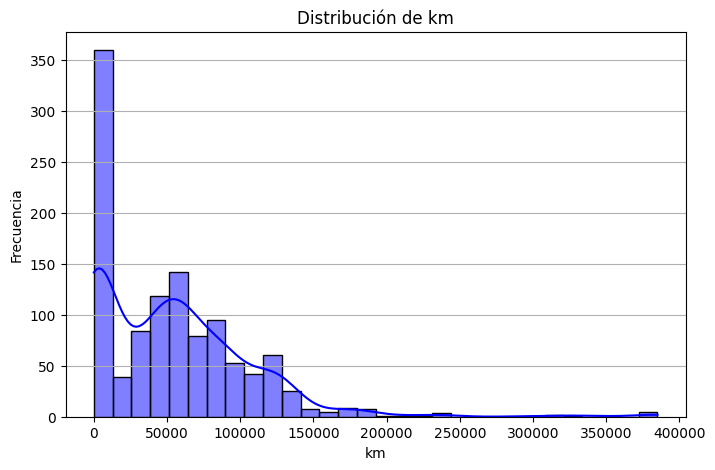

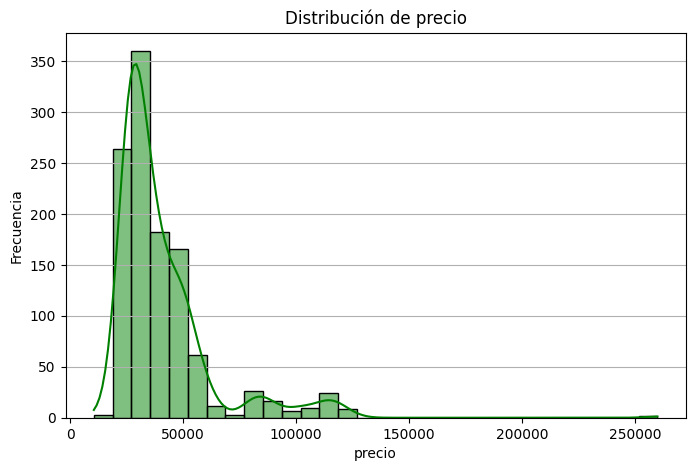

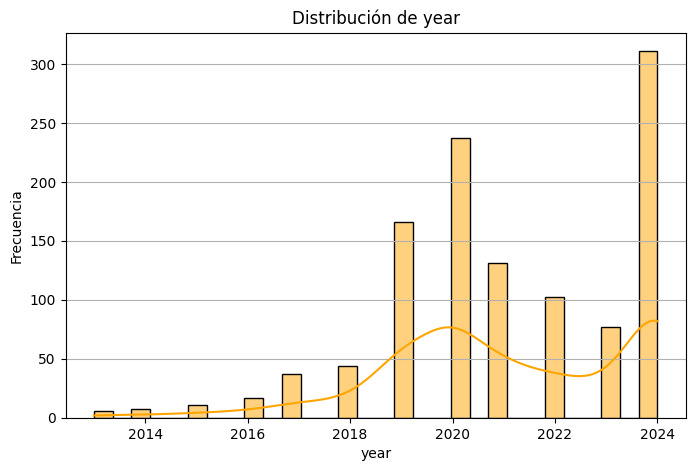

In [40]:
# Variables relevantes para histogramas
variables_hist = ['km', 'precio', 'year']

# Generar histogramas para cada variable relevante
for var in variables_hist:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True, bins=30, color='blue' if var == 'km' else 'green' if var == 'precio' else 'orange')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()


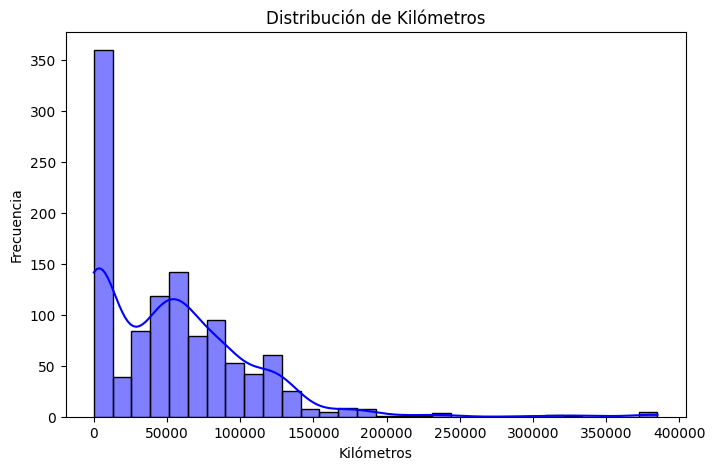

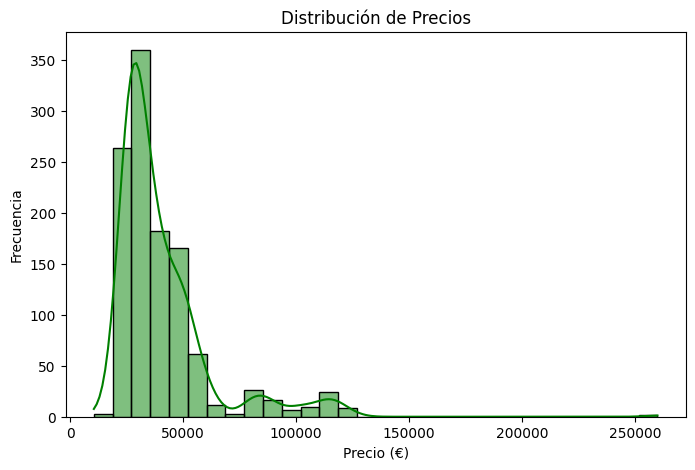

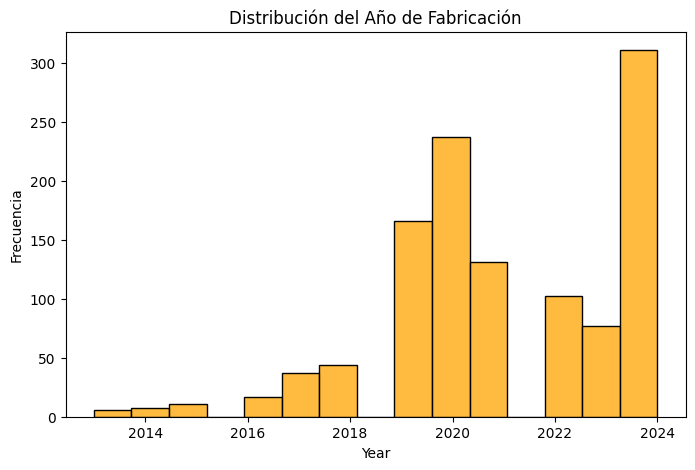

In [11]:
# 2. Visualización
# (a) Histogramas

# Histograma para Kilómetros
plt.figure(figsize=(8, 5))
sns.histplot(df['km'], kde=True, bins=30, color='blue')
plt.title('Distribución de Kilómetros')
plt.xlabel('Kilómetros')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para Precio
plt.figure(figsize=(8, 5))
sns.histplot(df['precio'], kde=True, bins=30, color='green')
plt.title('Distribución de Precios')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para Año
plt.figure(figsize=(8, 5))
sns.histplot(df['year'], kde=False, bins=15, color='orange')
plt.title('Distribución del Año de Fabricación')
plt.xlabel('Year')
plt.ylabel('Frecuencia')
plt.show()


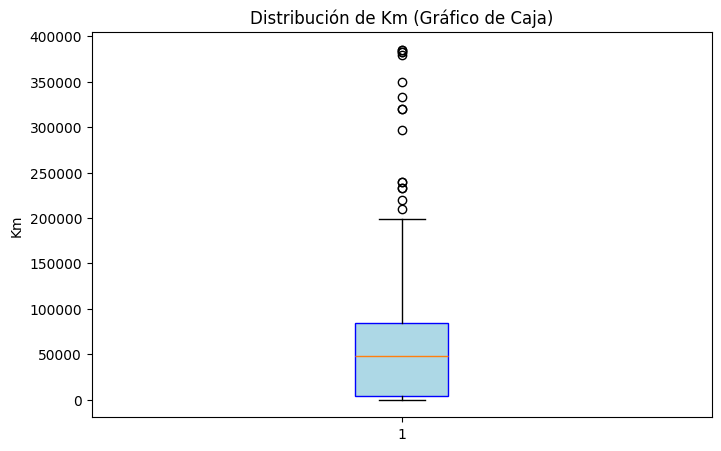

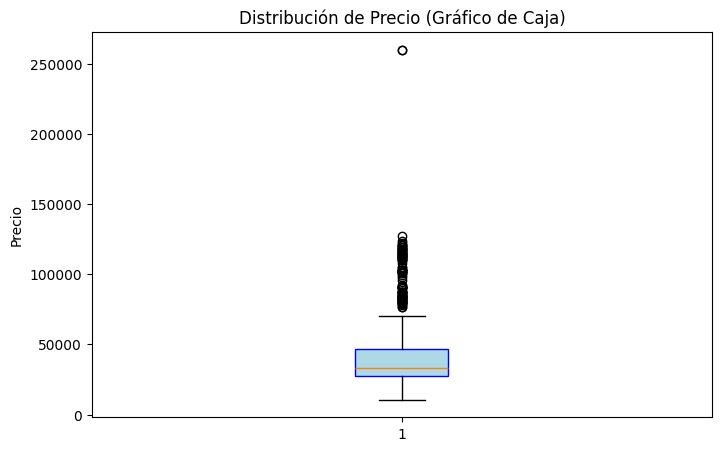

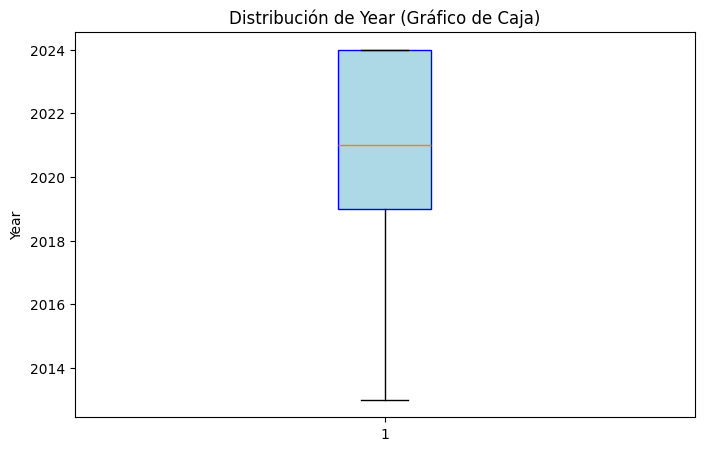

In [58]:
# (b) Gráficos de Caja

# Variables relevantes para gráficos de caja
variables_box = ['km', 'precio', 'year']

# Crear gráficos de caja para cada variable
for var in variables_box:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[var], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
    plt.title(f'Distribución de {var.capitalize()} (Gráfico de Caja)')
    plt.ylabel(var.capitalize())
    plt.show()

In [59]:
# Calcular la media de la columna 'km'
km_mean = df['km'].mean()

# Filtrar valores de 'km' que sean 6 veces superiores a la media
valores_superiores_km = df[df['km'] > 6 * km_mean]

# Mostrar los resultados
print(f"Media de la columna 'km': {km_mean:.2f}")
print("\nValores de 'km' que son 6 veces superiores a la media:")
print(valores_superiores_km)

Media de la columna 'km': 54055.44

Valores de 'km' que son 6 veces superiores a la media:
     Unnamed: 0   modelo        km   color   precio  year
31           31  Model S  385000.0   negro  10500.0  2013
99           99  Model S  382100.0  marron  20999.0  2017
558         558  Model S  350000.0   negro  24990.0  2016
562         562  Model S  385000.0   negro  10500.0  2013
568         568  Model S  333333.0    gris  17000.0  2015
577         577  Model S  379000.0   negro  22000.0  2015
579         579  Model S  382100.0  marrón  20999.0  2017


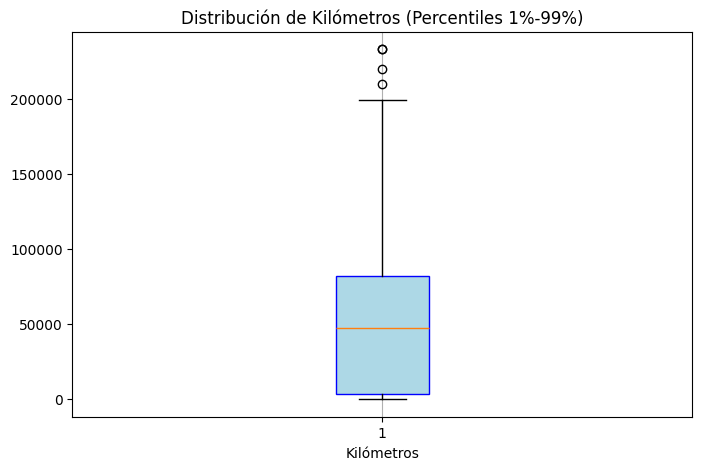

In [60]:
# Código para Gráfico de Caja con Percentiles columna 'km'

# Calcular percentiles 1% y 99%
lower_percentile_km = df['km'].quantile(0.01)
upper_percentile_km = df['km'].quantile(0.99)

# Filtrar valores dentro de los percentiles 1%-99%
df_percentile_km = df[(df['km'] >= lower_percentile_km) & (df['km'] <= upper_percentile_km)]

# Crear gráfico de caja
plt.figure(figsize=(8, 5))
plt.boxplot(df_percentile_km['km'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Distribución de Kilómetros (Percentiles 1%-99%)')
plt.xlabel('Kilómetros')
plt.grid(axis='x')
plt.show()


In [61]:
# Calcular la media de la columna 'precio'
precio_mean = df['precio'].mean()

# Filtrar valores de 'precio' que sean 4 veces superiores a la media
valores_superiores = df[df['precio'] > 4 * precio_mean]

# Mostrar los resultados
print(f"Media de la columna 'precio': {precio_mean:.2f}")
print("\nValores de 'precio' que son 4 veces superiores a la media:")
print(valores_superiores)


Media de la columna 'precio': 40803.40

Valores de 'precio' que son 4 veces superiores a la media:
     Unnamed: 0   modelo   km color    precio  year
95           95  Model X  1.0  gris  259900.0  2024
684         684  Model X  1.0  gris  259900.0  2024


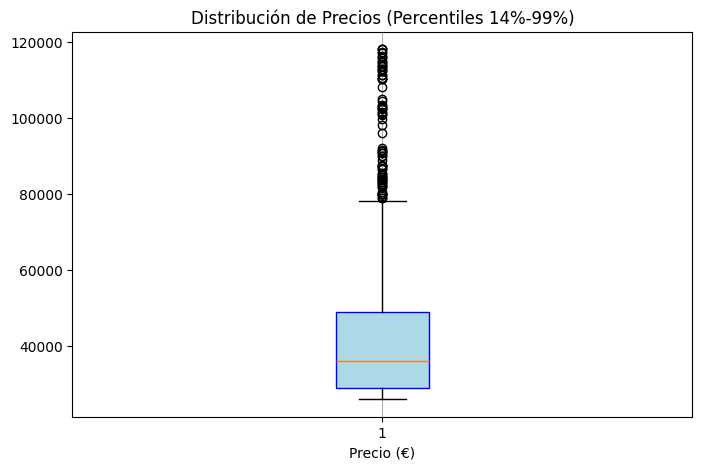

In [62]:
# Gráfico de Caja con Percentiles columna 'precio' 

# Calcular los percentiles 14% y 99%
lower_percentile = df['precio'].quantile(0.14)
upper_percentile = df['precio'].quantile(0.99)

# Filtrar los datos dentro del rango de percentiles
df_filtered = df[(df['precio'] >= lower_percentile) & (df['precio'] <= upper_percentile)]

# Crear el gráfico de caja para los valores filtrados
plt.figure(figsize=(8, 5))
plt.boxplot(df_filtered['precio'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Distribución de Precios (Percentiles 14%-99%)')
plt.xlabel('Precio (€)')
plt.grid(axis='x')
plt.show()


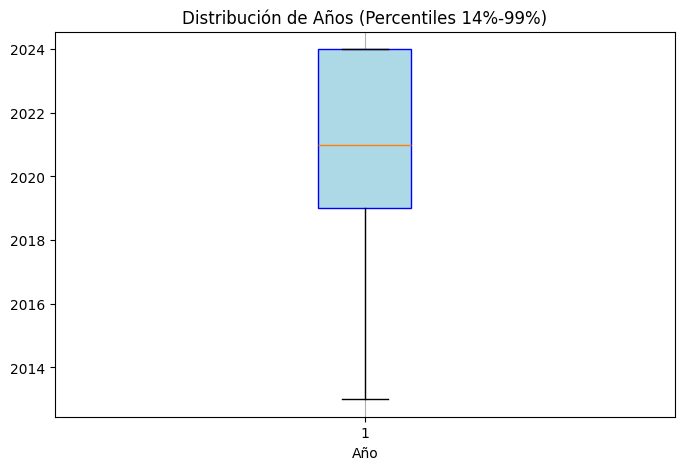

In [ ]:
# Gráfico de Caja columna 'year' 

# Crear el gráfico de caja para los valores filtrados
plt.figure(figsize=(8, 5))
plt.boxplot(df['year'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Distribución de Años (Percentiles 14%-99%)')
plt.xlabel('Año')
plt.grid(axis='x')
plt.show()

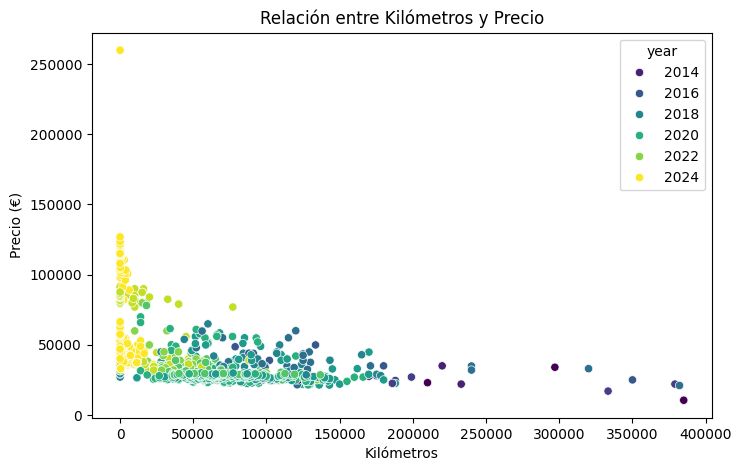

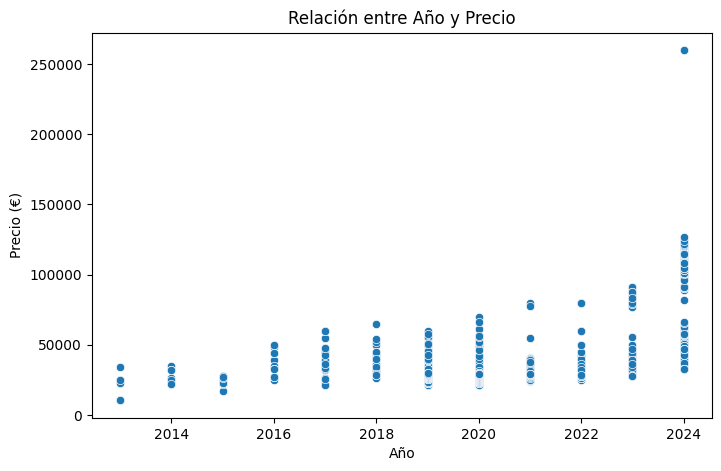

In [ ]:
# (c) Gráficos de Dispersión

# Relación entre Kilómetros y Precio
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['km'], y=df['precio'], hue=df['year'], palette='viridis')
plt.title('Relación entre Kilómetros y Precio')
plt.xlabel('Kilómetros')
plt.ylabel('Precio (€)')
plt.colorbar = True  # Opcional: Agrega barra de color para hue
plt.show()

# Relación entre Año y Precio
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['year'], y=df['precio'])
plt.title('Relación entre Año y Precio')
plt.xlabel('Año')
plt.ylabel('Precio (€)')
plt.show()



In [73]:
# Identificación de Valores Atípicos

# Identificación de Valores Atípicos usando el Rango Intercuartílico (IQR)
def identificar_outliers(df, columnas):
    for col in columnas:
        # Calcular los cuartiles y el rango intercuartílico (IQR)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar los valores atípicos
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Mostrar resultados
        print(f"\nColumna: {col}")
        print(f"  Q1 (25%): {Q1}")
        print(f"  Q3 (75%): {Q3}")
        print(f"  IQR: {IQR}")
        print(f"  Límite inferior: {lower_bound}")
        print(f"  Límite superior: {upper_bound}")
        print(f"  Valores atípicos detectados: {len(outliers)}")

# Columnas relevantes para detectar valores atípicos
columnas_relevantes = ['km', 'precio', 'year']

# Identificar valores atípicos
identificar_outliers(df, columnas_relevantes)



Columna: km
  Q1 (25%): 3731.25
  Q3 (75%): 84188.0
  IQR: 80456.75
  Límite inferior: -116953.875
  Límite superior: 204873.125
  Valores atípicos detectados: 16

Columna: precio
  Q1 (25%): 27500.0
  Q3 (75%): 46875.0
  IQR: 19375.0
  Límite inferior: -1562.5
  Límite superior: 75937.5
  Valores atípicos detectados: 96

Columna: year
  Q1 (25%): 2019.0
  Q3 (75%): 2024.0
  IQR: 5.0
  Límite inferior: 2011.5
  Límite superior: 2031.5
  Valores atípicos detectados: 0
